## Описание данных
### Таблица users (информация о пользователях):
    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана
### Таблица calls (информация о звонках):
    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок
### Таблица messages (информация о сообщениях):
    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение
### Таблица internet (информация об интернет-сессиях):
    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя
### Таблица tariffs (информация о тарифах):
    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Описание тарифов
## Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

## Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

1. Вступление [`Шаг_1`](#Шаг_1)

2. Предобработка [`Шаг_2`](#Шаг_2)

3. Добавление столбцов [`Шаг_3`](#Шаг_3)

4. Проверка гипотез [`Шаг_4`](#Шаг_4)

5. Вывод [`Шаг_5`](#Шаг_5)

# Шаг_1

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

pd.set_option("display.max_columns", 90)

path = 'C:/Users/Mikhail/оформление/Статистический анализ данных/'

try:
    data_calls = pd.read_csv(path + 'calls.csv')
    data_internet  = pd.read_csv(path + 'internet.csv')
    data_messages = pd.read_csv(path +  'messages.csv')
    data_tariffs = pd.read_csv(path + 'tariffs.csv')
    data_users = pd.read_csv(path + 'users.csv')
except:
    data_calls = pd.read_csv('/datasets/calls.csv')
    data_internet  = pd.read_csv('/datasets/internet.csv')
    data_messages = pd.read_csv('/datasets/messages.csv')
    data_tariffs = pd.read_csv('/datasets/tariffs.csv')
    data_users = pd.read_csv('/datasets/users.csv')

In [2]:
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [3]:
data_calls.query(' duration == 0')['duration'].count() / len(data_calls)

0.19551644316336553

In [4]:
data_calls.info(), data_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


(None,
             duration        user_id
 count  202607.000000  202607.000000
 mean        6.755887    1253.940619
 std         5.843365     144.722751
 min         0.000000    1000.000000
 25%         1.300000    1126.000000
 50%         6.000000    1260.000000
 75%        10.700000    1379.000000
 max        38.000000    1499.000000)

In [5]:
for col in data_calls.columns:
    pct_missing = np.mean(data_calls[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
call_date - 0%
duration - 0%
user_id - 0%


In [6]:
data_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [7]:
data_internet.info(), data_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


(None,
           Unnamed: 0        mb_used        user_id
 count  149396.000000  149396.000000  149396.000000
 mean    74697.500000     370.192426    1252.099842
 std     43127.054745     278.300951     144.050823
 min         0.000000       0.000000    1000.000000
 25%     37348.750000     138.187500    1130.000000
 50%     74697.500000     348.015000    1251.000000
 75%    112046.250000     559.552500    1380.000000
 max    149395.000000    1724.830000    1499.000000)

In [8]:
for col in data_internet.columns:
    pct_missing = np.mean(data_internet[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
id - 0%
mb_used - 0%
session_date - 0%
user_id - 0%


In [9]:
data_internet.query(' mb_used == 0')['mb_used'].count() / len(data_internet)

0.13118155773916304

In [10]:
data_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [11]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
for col in data_messages.columns:
    pct_missing = np.mean(data_messages[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
message_date - 0%
user_id - 0%


In [13]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [15]:
data_users.info(), data_users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


(None,
            user_id        age
 count   500.000000  500.00000
 mean   1249.500000   46.58800
 std     144.481833   16.66763
 min    1000.000000   18.00000
 25%    1124.750000   32.00000
 50%    1249.500000   46.00000
 75%    1374.250000   62.00000
 max    1499.000000   75.00000)

In [16]:
for col in data_users.columns:
    pct_missing = np.mean(data_users[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

user_id - 0%
age - 0%
churn_date - 92%
city - 0%
first_name - 0%
last_name - 0%
reg_date - 0%
tariff - 0%


In [17]:
def plot_box(data, row, title):
    data.boxplot(row)
    plt.title(title)
    plt.show

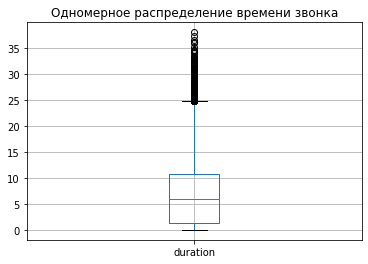

In [18]:
plot_box(data_calls, 'duration', 'Одномерное распределение времени звонка')

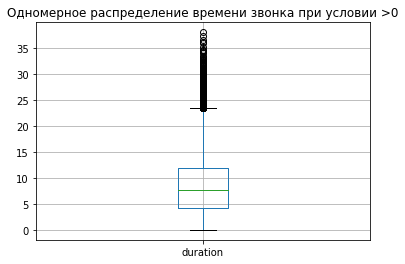

In [19]:
plot_box(data_calls.query('duration != 0'), 'duration', 'Одномерное распределение времени звонка при условии >0')

In [20]:
data_calls['duration'].mean(), data_calls['duration'].median()

(6.755887210214854, 6.0)

In [21]:
data_calls.query('duration != 0')['duration'].mean(), data_calls.query('duration != 0')['duration'].median()

(8.397794029228075, 7.74)

1. Отброс нулевых значений не сильно исказить распределение значений, так до отсечения верхней границей было ~25 минут, а после ~ 23 минуты.
1. Отрброс нулевых значений умеличил среднюю  продолжительность звонка на 2 минуты, а медиану на 1.7
1. Нулевые значения так же не отразятся на финансвоых показателях, но влияют на среднее и медиану.

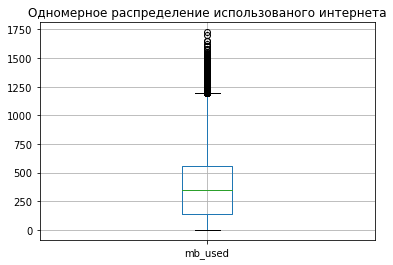

In [22]:
plot_box(data_internet, 'mb_used', 'Одномерное распределение использованого интернета')

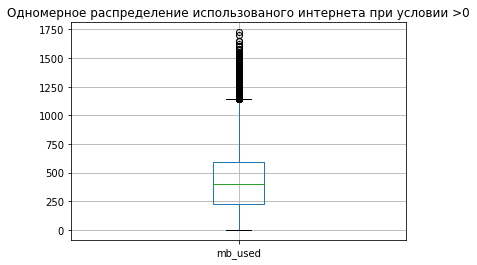

In [23]:
plot_box(data_internet.query('mb_used != 0'), 'mb_used', 'Одномерное распределение использованого интернета при условии >0')

In [24]:
data_internet['mb_used'].mean(), data_internet['mb_used'].median()

(370.19242637018823, 348.015)

In [25]:
data_internet.query('mb_used != 0')['mb_used'].mean(), data_internet.query('mb_used != 0')['mb_used'].median()

(426.08721035763756, 400.54)

1. Отброс нулевых значений не сильно исказить распределение значений, так до отсечения верхней границей было ~1200Мб , то после ~ 1100Мб.
2. Отрброс нулевых значений умеличил среднее использование интернета на 60Мб минуты, а медиану на 52Мб.
3.  Нулевые значения так же не отразятся на финансвоых показателях, но влияют на среднее и медиану.

1. call_date - object, а не dt тип
2. 19% звонков это 0 минут
3. session_date - не dt формата
4. 13% в столбце mb_usedимеют нулевые значения
5. среднеквадратичное отклоннение так же очень высоко в mb_used
6. message_date  не dt формата
7. churn_date - пропуски связаны с тем, что отсутсвие значения означает не закрытый договор с клиентом.

# Шаг_2

## Подготовьте данные

1. Приведите данные к нужным типам;

Найдите и исправьте ошибки в данных.

Поясните, какие ошибки вы нашли и как их исправили. Обратите внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Обрабатывать ли эти нулевые значения, решать вам — оцените, как их отсутствие повлияет на результаты анализа.

Посчитайте для каждого пользователя:

1. количество сделанных звонков и израсходованных минут разговора по месяцам;

2. количество отправленных сообщений по месяцам;

3. объем израсходованного интернет-трафика по месяцам;

4. помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [26]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [27]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format = '%Y-%m-%d')
data_calls['month'] = data_calls['call_date'].dt.month
#data_calls.head(), data_calls.info()

In [28]:
data_calls = data_calls.query('duration != 0')
data_calls = data_calls.reset_index(drop=True)

In [29]:
data_calls_group_count = data_calls.groupby(by=['user_id', 'month'], as_index=False )['duration'].count()
data_calls_group_sum = data_calls.groupby(by=['user_id', 'month'], as_index=False )['duration'].sum()
data_calls_group = data_calls_group_count.merge(data_calls_group_sum, on=['user_id', 'month'], how='outer')
data_calls_group.columns = ['user_id', 'month', 'duration_count', 'duration_sum']
data_calls_group

,user_id,month,duration_count,duration_sum
0,1000,5,17,150.06
1,1000,6,28,158.90
2,1000,7,41,318.80
3,1000,8,42,389.87
4,1000,9,46,440.14
...,...,...,...,...
3163,1498,10,30,232.63
3164,1499,9,8,64.65
3165,1499,10,44,429.91
3166,1499,11,62,576.50


1. Вывел номер месяца в отдельный стобец для группировки
2. Сгруппировал по юзеру и месяцу и сохранил это в отдельную переменную для дальнейшей работы

In [30]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [31]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format = '%Y-%m-%d')
data_internet['month'] = data_internet['session_date'].dt.month
#data_internet.head()

In [32]:
data_internet = data_internet.query('mb_used != 0')
data_internet = data_internet.reset_index(drop=True)
#data_internet

### Переведем Мб в Гб

In [33]:
data_internet['gb_used'] = data_internet['mb_used'] / 1024
#data_internet

In [34]:
data_internet_group = data_internet.groupby(by=['user_id', 'month'], as_index=False )['gb_used'].sum()
data_internet_group.columns = ['user_id', 'month', 'gb_used']
data_internet_group

,user_id,month,gb_used
0,1000,5,2.200674
1,1000,6,22.689229
2,1000,7,13.675430
3,1000,8,13.726494
4,1000,9,14.227451
...,...,...,...
3196,1498,10,20.097031
3197,1499,9,1.802490
3198,1499,10,17.371592
3199,1499,11,17.542295


1. Вывел номер месяца в отдельный стобец для группировки
2. Сгруппировал по юзеру и месяцу и сохранил это в отдельную переменную для дальнейшей работы
3. Перевел Мб в Гб для расчета стоимости пр ииспользовании интернета свыше тарифного плана

In [35]:
data_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [36]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format = '%Y-%m-%d')
data_messages['month'] = data_messages['message_date'].dt.month
#data_messages.head()

In [37]:
data_messages_group = data_messages.groupby(by=['user_id', 'month'], as_index=False)['message_date'].count()
data_messages_group.columns = ['user_id', 'month', 'message_count']
data_messages_group

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


1. Вывел номер месяца в отдельный стобец для группировки
2. Сгруппировал по юзеру и месяцу и сохранил это в отдельную переменную для дальнейшей работы

In [38]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [39]:
data_tariffs = data_tariffs.rename({'tariff_name': 'tariff'}, axis='columns')
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [40]:
data = data_calls_group.merge(data_internet_group, on=['user_id', 'month'], how='left')
data = data.merge(data_messages_group, on=['user_id', 'month'], how='left')
data = data.merge(data_users[['user_id', 'tariff', 'city']], on=['user_id'], how='left')
#data


In [41]:
data['duration_sum'] = np.ceil(data['duration_sum'])
data['gb_used'] = np.ceil(data['gb_used'])

In [42]:
data

,user_id,month,duration_count,duration_sum,gb_used,message_count,tariff,city
0,1000,5,17,151.0,3.0,22.0,ultra,Краснодар
1,1000,6,28,159.0,23.0,60.0,ultra,Краснодар
2,1000,7,41,319.0,14.0,75.0,ultra,Краснодар
3,1000,8,42,390.0,14.0,81.0,ultra,Краснодар
4,1000,9,46,441.0,15.0,57.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3163,1498,10,30,233.0,21.0,42.0,smart,Владикавказ
3164,1499,9,8,65.0,2.0,11.0,smart,Пермь
3165,1499,10,44,430.0,18.0,48.0,smart,Пермь
3166,1499,11,62,577.0,18.0,59.0,smart,Пермь


1. Объеденил все таблицы в одну с доп. стодбцами тарифа и города

In [43]:
data_test = data.merge(data_tariffs, on=['tariff'], how='left')
data_test['mb_per_month_included'] = data_test['mb_per_month_included'] / 1024
#data_test

In [44]:
print(f'Количество клиентов: {data_test.user_id.nunique()}')

Количество клиентов: 492


Отдельная таблица которая содержит все столбцы данные по заданию для вычисления дохода от клиента в месяц.

In [45]:
def message_send (row):
    extra_message = row['message_count'] - row['messages_included']
    if extra_message <=0:
        extra_message = 0
    else:
        extra_message = extra_message * row['rub_per_message']
    return extra_message
        

In [46]:
def internet_used(row):
    extra_internet =row['gb_used'] - row['mb_per_month_included']
    if extra_internet <= 0:
        extra_internet = 0
    else:
        extra_internet = extra_internet * row['rub_per_gb']
    return extra_internet


In [47]:
def call_used(row):
    extra_call = row['duration_sum'] - row['minutes_included']
    if extra_call <= 0:
        extra_call = 0
    else:
        extra_call = extra_call * row['rub_per_minute']
    return extra_call

In [48]:
data_test['massage_rub'] = data_test.apply(message_send, axis=1)
data_test['massage_rub'] = data_test['massage_rub'].fillna(0)
data_test['internet_rub'] = data_test.apply(internet_used, axis=1)
data_test['internet_rub'] = data_test['internet_rub'] .fillna(0)
data_test['call_rub'] = data_test.apply(call_used, axis=1)
data_test['income_month'] = data_test['rub_monthly_fee'] + data_test['massage_rub'] + data_test['internet_rub'] + data_test['call_rub']

In [49]:
data_test['income_month'].describe()

count    3168.000000
mean     1501.598801
std       795.217005
min       550.000000
25%       721.000000
50%      1550.000000
75%      1950.000000
max      6614.000000
Name: income_month, dtype: float64

In [50]:
data_test

,user_id,month,duration_count,duration_sum,gb_used,message_count,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,massage_rub,internet_rub,call_rub,income_month
0,1000,5,17,151.0,3.0,22.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,28,159.0,23.0,60.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,41,319.0,14.0,75.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,42,390.0,14.0,81.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,46,441.0,15.0,57.0,ultra,Краснодар,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,1498,10,30,233.0,21.0,42.0,smart,Владикавказ,50,15.0,500,550,200,3,3,0.0,1200.0,0.0,1750.0
3164,1499,9,8,65.0,2.0,11.0,smart,Пермь,50,15.0,500,550,200,3,3,0.0,0.0,0.0,550.0
3165,1499,10,44,430.0,18.0,48.0,smart,Пермь,50,15.0,500,550,200,3,3,0.0,600.0,0.0,1150.0
3166,1499,11,62,577.0,18.0,59.0,smart,Пермь,50,15.0,500,550,200,3,3,27.0,600.0,231.0,1408.0


1. При применении функции появились строки с NaN т.к в таблицах (звонки/интернет/сообщения) были месяцы которых не было в других таблицах т.к. клиент не пользовался услогой в месяце вовсе - я заменил эти значения на 0, т.к за тариф он платит, а доп. платы у него не будет т.к нет перерасхода тарифа.


In [51]:
for col in data_test.columns:
    pct_missing = np.mean(data_test[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

user_id - 0%
month - 0%
duration_count - 0%
duration_sum - 0%
gb_used - 0%
message_count - 16%
tariff - 0%
city - 0%
messages_included - 0%
mb_per_month_included - 0%
minutes_included - 0%
rub_monthly_fee - 0%
rub_per_gb - 0%
rub_per_message - 0%
rub_per_minute - 0%
massage_rub - 0%
internet_rub - 0%
call_rub - 0%
income_month - 0%


In [52]:
data = data.merge(data_test[['income_month', 'user_id', 'month']], on=['month', 'user_id'], how='outer')
data.sort_values('user_id')
#data

,user_id,month,duration_count,duration_sum,gb_used,message_count,tariff,city,income_month
0,1000,5,17,151.0,3.0,22.0,ultra,Краснодар,1950.0
1,1000,6,28,159.0,23.0,60.0,ultra,Краснодар,1950.0
2,1000,7,41,319.0,14.0,75.0,ultra,Краснодар,1950.0
3,1000,8,42,390.0,14.0,81.0,ultra,Краснодар,1950.0
4,1000,9,46,441.0,15.0,57.0,ultra,Краснодар,1950.0
...,...,...,...,...,...,...,...,...,...
3163,1498,10,30,233.0,21.0,42.0,smart,Владикавказ,1750.0
3166,1499,11,62,577.0,18.0,59.0,smart,Пермь,1408.0
3164,1499,9,8,65.0,2.0,11.0,smart,Пермь,550.0
3165,1499,10,44,430.0,18.0,48.0,smart,Пермь,1150.0


1. Объеденил все в итоговую таблицу без лишних столбцов.

# Шаг_3

## Проанализируйте данные

1. Опишите поведение клиентов оператора, исходя из выборки. 
2. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
3. Посчитайте среднее количество, дисперсию и стандартное отклонение.
4. Постройте гистограммы. 
5. Опишите распределения.

In [53]:
data_var = np.var(data[['duration_sum', 'gb_used', 'message_count']], ddof=1)
data_std = np.std(data[['duration_sum', 'gb_used', 'message_count']], ddof=1)

In [54]:
data_ultra_mean = data.query('tariff == "ultra"')[['duration_sum', 'gb_used', 'message_count']].mean()
data_smart_mean = data.query('tariff == "smart"')[['duration_sum', 'gb_used', 'message_count']].mean()

In [55]:
data_mean = pd.concat([data_ultra_mean, data_smart_mean], axis=1)
data_mean.columns = ['ultra_user_mean', 'smart_user_mean']

In [56]:
data_std_avr =  pd.concat([data_var, data_std], axis=1)
data_std_avr.columns = ['variance', 'std']

In [57]:
data_std_var_mean = data_mean.join(data_std_avr)
data_std_var_mean

,ultra_user_mean,smart_user_mean,variance,std
duration_sum,517.512144,396.344890,50331.664226,224.347196
gb_used,19.726496,16.346102,53.508809,7.314972
message_count,60.836627,38.748171,1174.760071,34.274773


1. Среднее по каждой категории для разных тарифных планов, дисперсия и стандартное отклонение в отдельной таблице для наглядности

In [58]:
smart_mean = data.query('tariff == "smart" ').pivot_table(index = ['month', 'tariff'],
                                                          values=['duration_sum', 'gb_used', 'message_count'], 
                                                          aggfunc='mean').reset_index()
ultra_mean = data.query('tariff == "ultra" ').pivot_table(index = ['month', 'tariff'],
                                                          values=['duration_sum', 'gb_used', 'message_count'], 
                                                          aggfunc='mean').reset_index()

In [59]:
#smart_mean

In [60]:
#ultra_mean

In [61]:
data_month_mean = smart_mean.merge(ultra_mean, how='outer')
data_month_mean

,month,tariff,duration_sum,gb_used,message_count
0,1,smart,199.363636,8.727273,19.733333
1,2,smart,283.413793,11.844828,27.940000
2,3,smart,368.337662,15.233766,35.550725
3,4,smart,349.891892,13.567568,35.736842
4,5,smart,365.709220,15.907801,39.032787
5,6,smart,375.969325,15.969325,38.510638
6,7,smart,386.004975,15.875622,38.988506
7,8,smart,400.068376,16.832618,38.857143
8,9,smart,406.575290,16.389961,39.252252
9,10,smart,404.136519,16.928082,39.154150


1. Средние значения использования для разных тарифов по месяцам.

In [62]:
sns.__version__

'0.11.0'

<div class="alert alert-info"> Версия модуля старая и я решил делать менее кравиой, но хоть работает.</div>

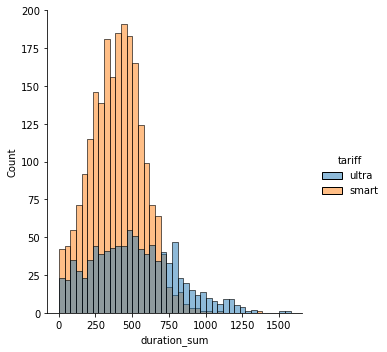

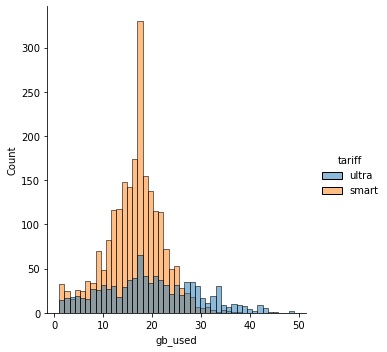

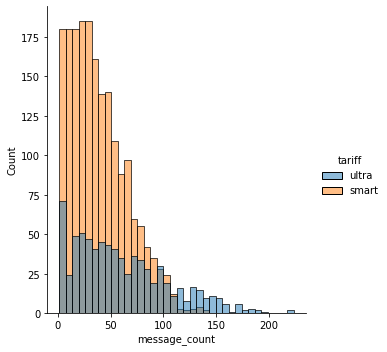

In [63]:
sns.displot(data, x="duration_sum", hue="tariff", aspect=.9)
sns.displot(data, x="gb_used", hue="tariff", aspect=.9)
sns.displot(data, x="message_count", hue="tariff", aspect=.9)

In [64]:
data_smart = data.query('tariff == "smart"')
data_ultra = data.query('tariff == "ultra"')

In [65]:
def var_plot(data_1, data_2, row, title_1, title_2):
    fig, axs = plt.subplots(1, 2)
    n_bins = 50
    axs[0].hist(data_1[row], bins=n_bins)
    axs[0].set_title(title_1)
    axs[1].hist(data_2[row], bins=n_bins)
    axs[1].set_title(title_2)

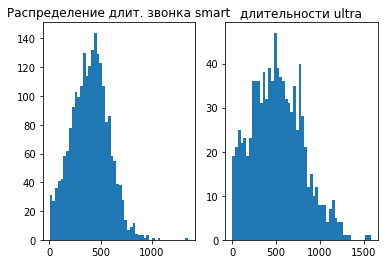

In [66]:
var_plot(data_smart, data_ultra, 'duration_sum', 'Распределение длит. звонка smart', 'длительности ultra')

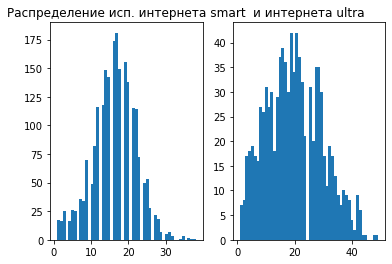

In [67]:
var_plot(data_smart, data_ultra, 'gb_used', 'Распределение исп. интернета smart', 'и интернета ultra')

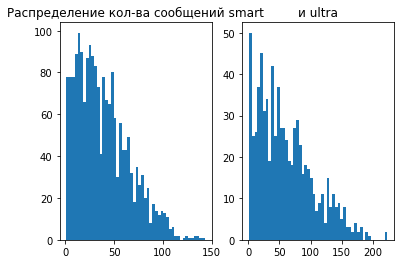

In [68]:
var_plot(data_smart, data_ultra, 'message_count', 'Распределение кол-ва сообщений smart', 'и ultra')

1. Распределение по длительности звонка:
        1.1 smart  тариф имеет более нормальное распределение
        1.2 ultra имеет более широкое распределение, т.к тариф имеет большие значения минут включенных в тариф, что объясняет наличие большого числа звонков за границей 1000 минут.
2. Распределение по использованому интернету:
        2.1 smart тириф имеет нормальное расределение с пиком около 17гб
        2.2 ultra тариф так же имеет более широкое распределение
3. Распределение по числу сообщений
        3.1 smart тариф распределение смещено в лево
        3.2 ultra так же смещено в лево, но имеет больший хвост, т.к так же тариф включает в себя болшее число сообщений

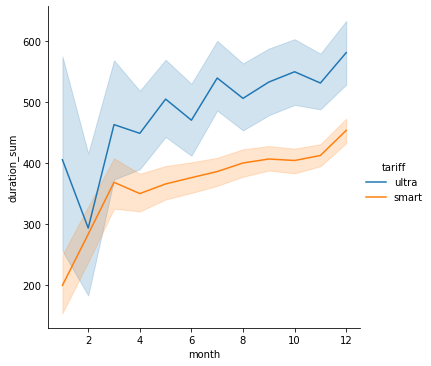

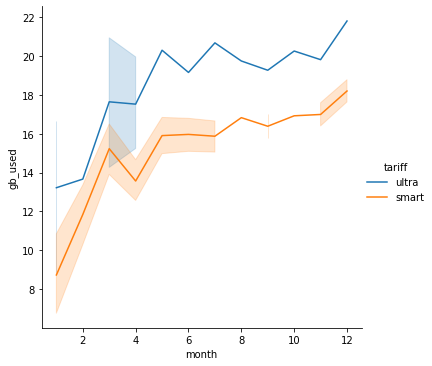

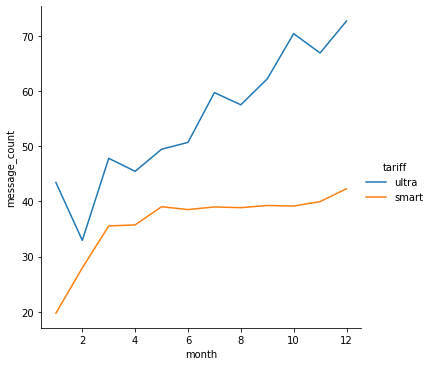

In [69]:
sns.relplot(x="month", y="duration_sum", hue="tariff", kind="line", data=data)
sns.relplot(x="month", y="gb_used", hue="tariff", kind="line", data=data)
sns.relplot(x="month", y="message_count", hue="tariff", kind="line", data=data)

В целом по всем категориям у всех тарифов виден рост использования услуг

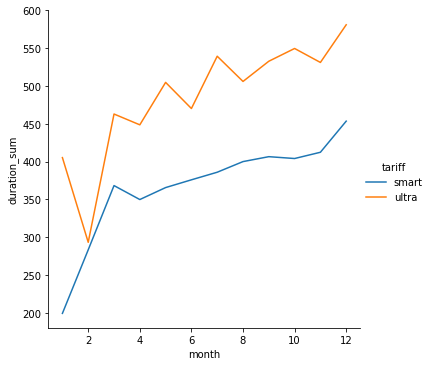

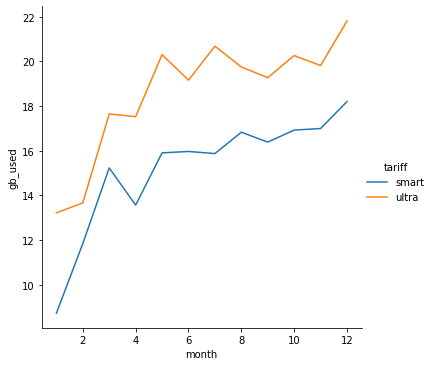

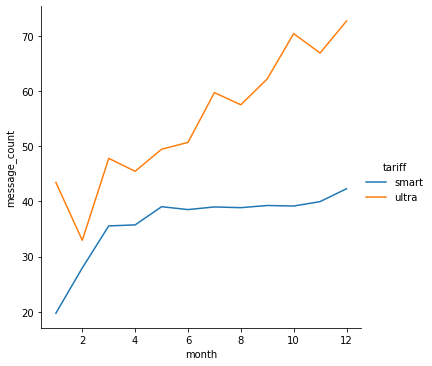

In [70]:
sns.relplot(x="month", y="duration_sum", hue="tariff", kind="line", data=data_month_mean)
sns.relplot(x="month", y="gb_used", hue="tariff", kind="line", data=data_month_mean)
sns.relplot(x="month", y="message_count", hue="tariff", kind="line", data=data_month_mean)

Построение графика по средним значениям в целом повторяет график по всей выборке

# Шаг_4

## Проверьте гипотезы

1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
3. Пороговое значение alpha задайте самостоятельно.

Поясните:
1. как вы формулировали нулевую и альтернативную гипотезы;
2. какой критерий использовали для проверки гипотез и почему.


<div class="alert alert-info"> Т.к мы хотим сравнить средние выручки, то имеем следующее - нам необходимо сравнить равны ли средние двух совокупностей по тарифу.
Исходя из этого формируем нулевую гипотезу, при потверждении которой можно будет говорить о некоторой вероятности, что такое или большее различие можно получить случайно. В ином случае, мы отвергаем нулевую гипотезу и можеи говорить о не равенстве двух средних  выручек совокупностей.
    
Так же мы делаем со следующей гипотезой - нам необходимо сравнить равны ли средние двух совокупностей по региону. </div>

Сформируем нулевую гипотезу таким образом:

**Равна ли средняя выручка пользователей тарифов «Ультра» и «Смарт»?** 

критический уровень статистической значимости определим как .05, хотя различные научные источники говорят о применении и меньшем значении (.01)

In [71]:
tariff_income = data.pivot_table(index = ['tariff'],
                                 values='income_month', 
                                 aggfunc='mean').reset_index()
tariff_income

,tariff,income_month
0,smart,1258.606484
1,ultra,2071.488912


In [72]:
alpha = .05# критический уровень статистической значимости

mean_income_smart = data.loc[data['tariff'] =='smart', 'income_month']
mean_income_ultra = data.loc[data['tariff'] =='ultra', 'income_month']

results =  st.ttest_ind(
    mean_income_smart,
    mean_income_ultra,
    equal_var=False,)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.027188422538144e-267
Отвергаем нулевую гипотезу


Данный результат говорит о том, что при таких данных с вероятностью p, средние выручки равны.

Сформируем нулевую гипотезу таким образом:


**Равна ли средняя выручка пользователей из Москвы и пользователей из других регионов?**

критический уровень статистической значимости определим как .05, хотя различные научные источники говорят о применении и меньшем значении (.01)

In [73]:
region = data
region.loc[region['city'] != 'Москва', 'city'] = 'Регион'

In [74]:
region_income = data.pivot_table(index = ['city'],
                                 values='income_month', 
                                 aggfunc='mean').reset_index()
region_income

,city,income_month
0,Москва,1526.144262
1,Регион,1495.745504


In [75]:
alpha = .05 # критический уровень статистической значимости

mean_income_Moscow = data.loc[data['city'] == 'Москва', 'income_month']
mean_income_Region = data.loc[data['city'] == 'Регион', 'income_month']

results =  st.ttest_ind(
    mean_income_Moscow,
    mean_income_Region,
    equal_var=False,)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3758731591553378
Не получилось отвергнуть нулевую гипотезу


Данный результат говорит о том, что хоть средние выручки и не одинаковы, 
но с вероятностью 37,5% такое или большее различие можно получить случайно.
Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками Москвы и регионов.

# Шаг_5

## Вывод

1. По данным можно сделать вывод, что для многих пользователей тарифф ultra является избыточным, т.к больщая часть тариф недоиспользуется, хотя многим пользователям в свою очередь может не хватить интернета входящего в тариф.
2. Сообщения наименее востребованная категория среди трех анализируемых
3. Можно говрить о том, что средняя выручка разных тарифов различется.
4. Выручка в меньшей степени зависит от региона.

- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: количество сделанных звонков и зрасходованных минут разговора по месяцам
- [x]  посчитано и добавлено в таблицу: количество отправленных сообщений по месяцам
- [x]  посчитано и добавлено в таблицу: объем израсходованного интернет-трафика по месяцам
- [x]  посчитано и добавлено в таблицу: помесячную выручку с каждого пользователя
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  писано поведение клиентов оператора, исходя из выборки
- [x]  посчитано среднее количество, дисперсия и стандартное отклонение
- [x]  построены гистограммы. Описаны распределения.
- [x]  проверены гипотеза: "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается "
- [x]  проверены гипотеза: "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"